# **Pertanyaan Bisnis**



1.   Bagaimana perbandingan tren berat dan nilai ekspor batik Indonesia dari tahun 2010 hingga 2021?
2.   Negara mana yang menjadi tujuan utama ekspor batik Indonesia?
3. Negara mana yang paling banyak mengimpor kain batik Indonesia?



# **Import Library yang diperlukan**

In [3]:
!pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 721.3 kB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
import folium
import plotly.express as px
import textwrap
import country_converter as coco

# **Mount to Google Drive**

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Wrangling**

## Gathering Data

In [6]:
export_df = pd.read_csv("/content/drive/MyDrive/EksporBatik_2010_2021.csv")
export_df

,Negara,B-10 (Kg),N-10 (USD),B-11 (Kg),N-11 (USD),B-12 (Kg),N-12 (USD),B-13 (Kg),N-13 (USD),B-14 (Kg),...,B-17 (Kg),N-17 (USD),B-18 (Kg),N-18 (USD),B-19 (Kg),N-19 (USD),B-20 (Kg),N-20 (USD),B-21 (Kg),N-21 (USD)
0,Afrika Selatan,410925.0,3781509.0,540736.0,5749429.0,296449.0,1874391.0,155523.0,1570822.0,55525.0,...,"31255,69","240012,23","40501,34","291926,45","14477,36","115884,47","14301,7","1187,9","2755,3","29524,62"
1,Albania,100.0,500.0,40.0,200.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aljazair,28356.0,25349.0,19332.0,295350.0,NaN,NaN,NaN,NaN,6788.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amerika Serikat,28772345.0,557758360.0,28728955.0,639544805.0,6521473.0,150177953.0,5531549.0,125879403.0,3859341.0,...,"2335990,27","48566661,36","1448409,27","28126317,21","1239081,65","24753192,22","19707557,47","1047693,11","1211509,9","24709455,73"
4,Angola,354.0,3870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Viet Nam,147244.0,1390290.0,61958.0,516041.0,89947.0,935246.0,142578.0,1330272.0,56531.0,...,"11572,55","85564,14","9242,17","85920,47","3517,32","46726,27","231780,25","16551,83","15554,83","234549,11"
153,VIRGIN ISLANDS (BRITISH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,"26,37",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Yaman,41124.0,418478.0,43700.0,438863.0,NaN,NaN,22195.0,462276.0,7644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,Yunani,8226.0,129891.0,10630.0,178029.0,5887.0,41645.0,2421.0,19474.0,447.0,...,334,"3780,25","41,45","824,51","510,23",8635,"16245,74","76,73","113,6","4214,85"


In [7]:
export_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Negara      157 non-null    object 
 1   B-10 (Kg)   122 non-null    float64
 2   N-10 (USD)  122 non-null    float64
 3   B-11 (Kg)   122 non-null    float64
 4   N-11 (USD)  122 non-null    float64
 5   B-12 (Kg)   80 non-null     float64
 6   N-12 (USD)  80 non-null     float64
 7   B-13 (Kg)   77 non-null     float64
 8   N-13 (USD)  77 non-null     float64
 9   B-14 (Kg)   69 non-null     float64
 10  N-14 (USD)  69 non-null     float64
 11  B-15 (Kg)   65 non-null     object 
 12  N-15 (USD)  65 non-null     object 
 13  B-16 (Kg)   70 non-null     object 
 14  N-16 (USD)  70 non-null     object 
 15  B-17 (Kg)   71 non-null     object 
 16  N-17 (USD)  71 non-null     object 
 17  B-18 (Kg)   72 non-null     object 
 18  N-18 (USD)  72 non-null     object 
 19  B-19 (Kg)   62 non-null     o

In [8]:
export_df.describe()

,B-10 (Kg),N-10 (USD),B-11 (Kg),N-11 (USD),B-12 (Kg),N-12 (USD),B-13 (Kg),N-13 (USD),B-14 (Kg),N-14 (USD)
count,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,8.000000e+01,8.000000e+01,7.700000e+01,7.700000e+01,6.900000e+01,6.900000e+01
mean,4.419347e+05,8.038484e+06,4.298193e+05,9.342993e+06,1.386065e+05,2.966596e+06,1.379422e+05,2.883745e+06,1.057608e+05,2.347562e+06
std,2.657261e+06,5.185545e+07,2.646440e+06,5.949213e+07,7.308355e+05,1.691308e+07,6.379166e+05,1.460858e+07,4.721008e+05,1.142788e+07
min,2.000000e+00,1.100000e+01,1.000000e+00,1.200000e+01,2.200000e+01,3.040000e+02,5.000000e+00,4.300000e+01,1.000000e+00,3.000000e+01
25%,1.002000e+03,7.775000e+03,1.748500e+03,1.816900e+04,3.840000e+02,4.592500e+03,2.370000e+02,5.377000e+03,3.280000e+02,5.963000e+03
50%,1.170850e+04,1.024210e+05,1.120800e+04,1.803300e+05,5.922500e+03,1.146660e+05,1.328900e+04,1.565600e+05,1.042700e+04,1.548900e+05
75%,1.173688e+05,1.461150e+06,1.006818e+05,1.667807e+06,6.517975e+04,9.847245e+05,6.942200e+04,1.239590e+06,4.462900e+04,7.166000e+05
max,2.877234e+07,5.577584e+08,2.872896e+07,6.395448e+08,6.521473e+06,1.501780e+08,5.531549e+06,1.258794e+08,3.859341e+06,9.366314e+07


## Assessing Data

In [9]:
export_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Negara      157 non-null    object 
 1   B-10 (Kg)   122 non-null    float64
 2   N-10 (USD)  122 non-null    float64
 3   B-11 (Kg)   122 non-null    float64
 4   N-11 (USD)  122 non-null    float64
 5   B-12 (Kg)   80 non-null     float64
 6   N-12 (USD)  80 non-null     float64
 7   B-13 (Kg)   77 non-null     float64
 8   N-13 (USD)  77 non-null     float64
 9   B-14 (Kg)   69 non-null     float64
 10  N-14 (USD)  69 non-null     float64
 11  B-15 (Kg)   65 non-null     object 
 12  N-15 (USD)  65 non-null     object 
 13  B-16 (Kg)   70 non-null     object 
 14  N-16 (USD)  70 non-null     object 
 15  B-17 (Kg)   71 non-null     object 
 16  N-17 (USD)  71 non-null     object 
 17  B-18 (Kg)   72 non-null     object 
 18  N-18 (USD)  72 non-null     object 
 19  B-19 (Kg)   62 non-null     o

Mengubah tipe data kolom yang berisi angka tetapi bertipe data 'object' menjadi 'float64'

In [10]:
cols_convert = export_df.select_dtypes(include=['object']).columns.tolist()
print(cols_convert)

['Negara', 'B-15 (Kg)', 'N-15 (USD)', 'B-16 (Kg)', 'N-16 (USD)', 'B-17 (Kg)', 'N-17 (USD)', 'B-18 (Kg)', 'N-18 (USD)', 'B-19 (Kg)', 'N-19 (USD)', 'B-20 (Kg)', 'N-20 (USD)', 'B-21 (Kg)', 'N-21 (USD)']


Menghapus kolom 'Negara' karena bukan kolom yang berisi angka

In [11]:
cols_convert.remove('Negara')
print(cols_convert)

['B-15 (Kg)', 'N-15 (USD)', 'B-16 (Kg)', 'N-16 (USD)', 'B-17 (Kg)', 'N-17 (USD)', 'B-18 (Kg)', 'N-18 (USD)', 'B-19 (Kg)', 'N-19 (USD)', 'B-20 (Kg)', 'N-20 (USD)', 'B-21 (Kg)', 'N-21 (USD)']


Mengubah *decimal separator*

In [12]:
for column in cols_convert:
    export_df[column] = export_df[column].astype(str).str.replace(',', '.', regex=False)

export_df.head()

,Negara,B-10 (Kg),N-10 (USD),B-11 (Kg),N-11 (USD),B-12 (Kg),N-12 (USD),B-13 (Kg),N-13 (USD),B-14 (Kg),...,B-17 (Kg),N-17 (USD),B-18 (Kg),N-18 (USD),B-19 (Kg),N-19 (USD),B-20 (Kg),N-20 (USD),B-21 (Kg),N-21 (USD)
0,Afrika Selatan,410925.0,3781509.0,540736.0,5749429.0,296449.0,1874391.0,155523.0,1570822.0,55525.0,...,31255.69,240012.23,40501.34,291926.45,14477.36,115884.47,14301.7,1187.9,2755.3,29524.62
1,Albania,100.0,500.0,40.0,200.0,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Aljazair,28356.0,25349.0,19332.0,295350.0,NaN,NaN,NaN,NaN,6788.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Amerika Serikat,28772345.0,557758360.0,28728955.0,639544805.0,6521473.0,150177953.0,5531549.0,125879403.0,3859341.0,...,2335990.27,48566661.36,1448409.27,28126317.21,1239081.65,24753192.22,19707557.47,1047693.11,1211509.9,24709455.73
4,Angola,354.0,3870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Mengubah tipe data menjadi 'float64'

In [13]:
for column in cols_convert:
    export_df[column] = pd.to_numeric(export_df[column], errors='coerce')

export_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Negara      157 non-null    object 
 1   B-10 (Kg)   122 non-null    float64
 2   N-10 (USD)  122 non-null    float64
 3   B-11 (Kg)   122 non-null    float64
 4   N-11 (USD)  122 non-null    float64
 5   B-12 (Kg)   80 non-null     float64
 6   N-12 (USD)  80 non-null     float64
 7   B-13 (Kg)   77 non-null     float64
 8   N-13 (USD)  77 non-null     float64
 9   B-14 (Kg)   69 non-null     float64
 10  N-14 (USD)  69 non-null     float64
 11  B-15 (Kg)   65 non-null     float64
 12  N-15 (USD)  65 non-null     float64
 13  B-16 (Kg)   70 non-null     float64
 14  N-16 (USD)  70 non-null     float64
 15  B-17 (Kg)   71 non-null     float64
 16  N-17 (USD)  71 non-null     float64
 17  B-18 (Kg)   72 non-null     float64
 18  N-18 (USD)  72 non-null     float64
 19  B-19 (Kg)   62 non-null     f

# **Data Prepocessing & Cleaning**

## Memeriksa dan Mengatasi Missing Value

In [14]:
# Memeriksa kolom mana saja yang memiliki missing values

missing_values = export_df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
B-10 (Kg)     35
N-10 (USD)    35
B-11 (Kg)     35
N-11 (USD)    35
B-12 (Kg)     77
N-12 (USD)    77
B-13 (Kg)     80
N-13 (USD)    80
B-14 (Kg)     88
N-14 (USD)    88
B-15 (Kg)     92
N-15 (USD)    92
B-16 (Kg)     87
N-16 (USD)    87
B-17 (Kg)     86
N-17 (USD)    86
B-18 (Kg)     85
N-18 (USD)    85
B-19 (Kg)     95
N-19 (USD)    95
B-20 (Kg)     85
N-20 (USD)    85
B-21 (Kg)     93
N-21 (USD)    93
dtype: int64


In [15]:
# Mengisi kolom yang memiliki missing values dengan '0'

export_df.fillna(0, inplace=True)
export_df.head()

,Negara,B-10 (Kg),N-10 (USD),B-11 (Kg),N-11 (USD),B-12 (Kg),N-12 (USD),B-13 (Kg),N-13 (USD),B-14 (Kg),...,B-17 (Kg),N-17 (USD),B-18 (Kg),N-18 (USD),B-19 (Kg),N-19 (USD),B-20 (Kg),N-20 (USD),B-21 (Kg),N-21 (USD)
0,Afrika Selatan,410925.0,3781509.0,540736.0,5749429.0,296449.0,1874391.0,155523.0,1570822.0,55525.0,...,31255.69,240012.23,40501.34,291926.45,14477.36,115884.47,14301.70,1187.90,2755.3,29524.62
1,Albania,100.0,500.0,40.0,200.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2,Aljazair,28356.0,25349.0,19332.0,295350.0,0.0,0.0,0.0,0.0,6788.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
3,Amerika Serikat,28772345.0,557758360.0,28728955.0,639544805.0,6521473.0,150177953.0,5531549.0,125879403.0,3859341.0,...,2335990.27,48566661.36,1448409.27,28126317.21,1239081.65,24753192.22,19707557.47,1047693.11,1211509.9,24709455.73
4,Angola,354.0,3870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00


In [16]:
# Periksa apakah masih terdapat kolom yang memiliki missing values

missing_values = export_df.isnull().sum()
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Negara        0
B-10 (Kg)     0
N-10 (USD)    0
B-11 (Kg)     0
N-11 (USD)    0
B-12 (Kg)     0
N-12 (USD)    0
B-13 (Kg)     0
N-13 (USD)    0
B-14 (Kg)     0
N-14 (USD)    0
B-15 (Kg)     0
N-15 (USD)    0
B-16 (Kg)     0
N-16 (USD)    0
B-17 (Kg)     0
N-17 (USD)    0
B-18 (Kg)     0
N-18 (USD)    0
B-19 (Kg)     0
N-19 (USD)    0
B-20 (Kg)     0
N-20 (USD)    0
B-21 (Kg)     0
N-21 (USD)    0
dtype: int64


In [17]:
export_df

,Negara,B-10 (Kg),N-10 (USD),B-11 (Kg),N-11 (USD),B-12 (Kg),N-12 (USD),B-13 (Kg),N-13 (USD),B-14 (Kg),...,B-17 (Kg),N-17 (USD),B-18 (Kg),N-18 (USD),B-19 (Kg),N-19 (USD),B-20 (Kg),N-20 (USD),B-21 (Kg),N-21 (USD)
0,Afrika Selatan,410925.0,3781509.0,540736.0,5749429.0,296449.0,1874391.0,155523.0,1570822.0,55525.0,...,31255.69,240012.23,40501.34,291926.45,14477.36,115884.47,14301.70,1187.90,2755.30,29524.62
1,Albania,100.0,500.0,40.0,200.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Aljazair,28356.0,25349.0,19332.0,295350.0,0.0,0.0,0.0,0.0,6788.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Amerika Serikat,28772345.0,557758360.0,28728955.0,639544805.0,6521473.0,150177953.0,5531549.0,125879403.0,3859341.0,...,2335990.27,48566661.36,1448409.27,28126317.21,1239081.65,24753192.22,19707557.47,1047693.11,1211509.90,24709455.73
4,Angola,354.0,3870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Viet Nam,147244.0,1390290.0,61958.0,516041.0,89947.0,935246.0,142578.0,1330272.0,56531.0,...,11572.55,85564.14,9242.17,85920.47,3517.32,46726.27,231780.25,16551.83,15554.83,234549.11
153,VIRGIN ISLANDS (BRITISH),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.00,26.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
154,Yaman,41124.0,418478.0,43700.0,438863.0,0.0,0.0,22195.0,462276.0,7644.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
155,Yunani,8226.0,129891.0,10630.0,178029.0,5887.0,41645.0,2421.0,19474.0,447.0,...,334.00,3780.25,41.45,824.51,510.23,8635.00,16245.74,76.73,113.60,4214.85


## Mengubah Struktur Bentuk Dataset

In [18]:
# Mengubah bentuk dataset menjadi ['Negara', 'Tahun', 'Berat', 'Nilai']
data = []

for col in export_df.columns:
    if col.startswith('B-'):  # Kolom untuk berat
        # Ekstrak tahun, menangani karakter non-numerik
        year_str = col.split('-')[1]
        year = int(year_str.split(' ')[0])
        for i, row in export_df.iterrows():
            data.append({'Negara': row['Negara'], 'Tahun': year, 'Berat': row[col], 'Nilai': 0}) # Nilai default untuk kolom 'Nilai'
    elif col.startswith('N-'):  # Kolom untuk nilai
        # Penanganan yang mirip untuk kolom 'N-'
        year_str = col.split('-')[1]
        year = int(year_str.split(' ')[0])
        for i, row in export_df.iterrows():
            for d in data:
                if d['Negara'] == row['Negara'] and d['Tahun'] == year: # Mencocokkan data berdasarkan negara dan tahun
                    d['Nilai'] = row[col]
                    break  # Menghentikan iterasi jika sudah ditemukan

Menyimpan ke dataframe baru

In [19]:
# Membuat DataFrame baru
batik_exp_fixed = pd.DataFrame(data)
batik_exp_fixed.head()  # Menampilkan 5 baris pertama dari DataFrame baru

,Negara,Tahun,Berat,Nilai
0,Afrika Selatan,10,410925.0,3781509.0
1,Albania,10,100.0,500.0
2,Aljazair,10,28356.0,25349.0
3,Amerika Serikat,10,28772345.0,557758360.0
4,Angola,10,354.0,3870.0


Mengubah isi kolom 'Tahun' menjadi format tahun penuh

In [20]:
# Ubah isi kolom 'Tahun' menjadi format tahun penuh (misalnya, 2010, 2011, dst.)
batik_exp_fixed['Tahun'] = batik_exp_fixed['Tahun'].apply(lambda x: '20' + str(x) if x < 10 else '20' + str(x))
batik_exp_fixed

,Negara,Tahun,Berat,Nilai
0,Afrika Selatan,2010,410925.00,3.781509e+06
1,Albania,2010,100.00,5.000000e+02
2,Aljazair,2010,28356.00,2.534900e+04
3,Amerika Serikat,2010,28772345.00,5.577584e+08
4,Angola,2010,354.00,3.870000e+03
...,...,...,...,...
1879,Viet Nam,2021,15554.83,2.345491e+05
1880,VIRGIN ISLANDS (BRITISH),2021,0.00,0.000000e+00
1881,Yaman,2021,0.00,0.000000e+00
1882,Yunani,2021,113.60,4.214850e+03


## Menerjemahkan Isi Kolom 'Negara' ke Bahasa Inggris

In [21]:
# Mendefinisikan sebuah kamus untuk menerjemahkan nama negara dari bahasa Indonesia ke bahasa Inggris
country_translation = {
    "Afrika Selatan": "South Africa",
    "Aljazair": "Algeria",
    "Amerika Serikat": "United States",
    "Bahama": "Bahamas",
    "Belanda": "Netherlands",
    "Belgia": "Belgium",
    "Chili": "Chile",
    "Cina": "China",
    "Ekuador": "Ecuador",
    "Fed Russia": "Russia",
    "Finlandia": "Finland",
    "Hongkong": "Hong Kong",
    "Hungaria": "Hungary",
    "Inggris": "United Kingdom",
    "Irak": "Iraq",
    "Irlandia": "Ireland",
    "Italia": "Italy",
    "Jepang": "Japan",
    "Jerman": "Germany",
    "Kaledonia Baru": "New Caledonia",
    "Kamboja": "Cambodia",
    "Kamerun": "Cameroon",
    "Kanada": "Canada",
    "Kongo": "Republic of the Congo",
    "Korea Selatan": "South Korea",
    "Kroasia": "Croatia",
    "Luksemburg": "Luxembourg",
    "Madagaskar": "Madagascar",
    "Maladewa": "Maldives",
    "Maroko": "Morocco",
    "Meksiko": "Mexico",
    "Mesir": "Egypt",
    "Nikaragua": "Nicaragua",
    "Norwegia": "Norway",
    "Pantai Gading": "Cote d'Ivoire",
    "Papua Nugini": "Papua New Guinea",
    "Perancis": "France",
    "Philipina": "Philippines",
    "Polandia": "Poland",
    "Rep Ceko": "Czech Republic",
    "Rep Dominica": "Dominican Republic",
    "Rumania": "Romania",
    "Saint Kitts & Nevis": "Saint Kitts and Nevis",
    "Sao Tome & Principe": "Sao Tome and Principe",
    "Selandia Baru": "New Zealand",
    "Singapura": "Singapore",
    "Spanyol": "Spain",
    "Srilanka": "Sri Lanka",
    "St Vincent & Grenada": "Saint Vincent and the Grenadines",
    "Swaziland": "Eswatini",
    "Swedia": "Sweden",
    "Swiss": "Switzerland",
    "Timor Timur": "Timor-Leste",
    "Trinidad & Tobago": "Trinidad and Tobago",
    "Turki": "Turkey",
    "TURKS & CAICOS ISLANDS": "Turks and Caicos Islands",
    "U.S. VIRGIN ISLANDS": "United States Virgin Islands",
    "Ukraina": "Ukraine",
    "Uni Emirat Arab": "United Arab Emirates",
    "Viet Nam": "Vietnam",
    "VIRGIN ISLANDS (BRITISH)": "British Virgin Islands",
    "Yaman": "Yemen",
    "Yunani": "Greece"
}

# Melakukan iterasi pada kamus dan mengganti nama negara Indonesia dengan nama negara Inggris dalam kolom 'Negara'
for key, value in country_translation.items():
    batik_exp_fixed['Negara'] = batik_exp_fixed['Negara'].str.replace(key, value)

# Menambahkan kolom baru 'Iso-3' pada DataFrame dengan kode negara ISO-3
batik_exp_fixed.insert(1, 'Iso-3', coco.convert(names=batik_exp_fixed['Negara'], to='ISO3'))

Menambahkan kode Iso-3 untuk negara "Netherlands Antilles" yaitu ANT

In [22]:
# Memeriksa apakah "Netherlands Antilles" ada di dalam DataFrame
if "Netherlands Antilles" in batik_exp_fixed['Negara'].values:
    # Jika ada, perbarui kolom 'Iso-3' yang sesuai
    batik_exp_fixed.loc[batik_exp_fixed['Negara'] == "Netherlands Antilles", 'Iso-3'] = 'ANT'
else:
    # Jika tidak ada, cetak pesan
    print("Negara 'Netherlands Antilles' tidak ditemukan dalam DataFrame.")

In [23]:
batik_exp_fixed

,Negara,Iso-3,Tahun,Berat,Nilai
0,South Africa,ZAF,2010,410925.00,3.781509e+06
1,Albania,ALB,2010,100.00,5.000000e+02
2,Algeria,DZA,2010,28356.00,2.534900e+04
3,United States,USA,2010,28772345.00,5.577584e+08
4,Angola,AGO,2010,354.00,3.870000e+03
...,...,...,...,...,...
1879,Vietnam,VNM,2021,15554.83,2.345491e+05
1880,British Virgin Islands,VGB,2021,0.00,0.000000e+00
1881,Yemen,YEM,2021,0.00,0.000000e+00
1882,Greece,GRC,2021,113.60,4.214850e+03


# **Exploratory Data Analysis (EDA)** and Data Visualization

Setelah dataframe sudah bersih, selanjutnya dapat melakukan proses EDA

## Mengeksplorasi data

In [24]:
batik_exp_fixed.describe(include="all")

,Negara,Iso-3,Tahun,Berat,Nilai
count,1884,1884,1884,1.884000e+03,1.884000e+03
unique,157,157,12,NaN,NaN
top,South Africa,ZAF,2010,NaN,NaN
freq,12,12,157,NaN,NaN
mean,NaN,NaN,NaN,1.010216e+05,1.752635e+06
std,NaN,NaN,NaN,1.101734e+06,2.131366e+07
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,1.000000e+00,1.810000e+00
75%,NaN,NaN,NaN,6.704597e+03,6.915650e+04


Berdasarkan rangkuman parameter statistik di atas, dapat diperoleh informasi seperti berikut:
1. Terdapat 157 negara tujuan ekspor batik Indonesia.
2. Periode ekspor batik Indonesia ini adalah selama 12 tahun.
3. Rata-rata berat kain yang diekspor selama periode adalah 101,021.6 kg dan maksimal berat kain yang diekspor selama periode adalah 28.772.340 kg.
4. Rata-rata nilai yang diperoleh Indonesia dari ekspor batik ini adalah 1.752.635 (USD) dan maksimal nilai yang diperoleh Indonesia dari ekspor batik adalah 639.544.800 (USD)

In [25]:
batik_exp_fixed.head()

,Negara,Iso-3,Tahun,Berat,Nilai
0,South Africa,ZAF,2010,410925.0,3781509.0
1,Albania,ALB,2010,100.0,500.0
2,Algeria,DZA,2010,28356.0,25349.0
3,United States,USA,2010,28772345.0,557758360.0
4,Angola,AGO,2010,354.0,3870.0


Menghitung total berat ekspor batik (dalam kilogram) dan total nilai ekspor (dalam USD) untuk setiap tahun dari dataset.

In [26]:
# Menghitung total berat dan nilai ekspor per tahun
yearly_totals = batik_exp_fixed.groupby('Tahun').agg({'Berat': 'sum', 'Nilai': 'sum'}).reset_index()

# Mengurutkan berdasarkan total nilai ekspor (tertinggi ke terendah)
yearly_totals_sorted = yearly_totals.sort_values(by='Nilai', ascending=False)

yearly_totals_sorted

,Tahun,Berat,Nilai
1,2011,5.243795e+07,1.139845e+09
0,2010,5.391603e+07,9.806950e+08
2,2012,1.108852e+07,2.373276e+08
3,2013,1.062155e+07,2.220484e+08
5,2015,8.803701e+06,1.991280e+08
6,2016,7.515395e+06,1.649892e+08
4,2014,7.297497e+06,1.619818e+08
7,2017,3.632339e+06,7.042079e+07
8,2018,2.654316e+06,4.807537e+07
9,2019,2.234840e+06,4.025004e+07


Berdasarkan tabel di atas, Indonesia mengeskpor batik paling banyak yaitu 52.437.950 kg dan memperoleh nilai ekspor paling tinggi (termahal) yaitu mencapai sekitar 1,14 miliar (USD) pada tahun 2011.

Sedangkan pada tahun 2020, Indonesia mengekspor batik paling sedikit yaitu 28.005.200 kg dan memperoleh nilai ekspor paling rendah dibanding tahun-tahun yang lain yaitu 1.744.895 (USD).

In [27]:
# Menghitung total berat dan nilai ekspor per negara
country_totals = batik_exp_fixed.groupby('Negara').agg({'Berat': 'sum', 'Nilai': 'sum'}).reset_index()

# Mengurutkan berdasarkan total nilai ekspor (tertinggi ke terendah)
country_totals_sorted = country_totals.sort_values(by='Nilai', ascending=False)

country_totals_sorted


,Negara,Berat,Nilai
148,United States,1.103672e+08,1.957591e+09
46,Germany,1.141434e+07,2.878243e+08
147,United Kingdom,6.790525e+06,1.691602e+08
66,Japan,5.232370e+06,1.383146e+08
146,United Arab Emirates,5.254359e+06,8.960921e+07
...,...,...,...
17,British Virgin Islands,8.000000e+00,2.637000e+01
112,Republic of the Congo,4.000000e+00,1.200000e+01
143,Turks and Caicos Islands,1.087720e+03,4.270000e+00
85,Monaco,2.319200e+02,2.100000e+00


Berdasarkan tabel di atas dalam periode 2010-2021, Indonesia paling banyak mengekspor batik ke negara United States (Amerika Serikat) yaitu total mencapai 110.367.200 kg dan memperoleh nilai ekspor paling tinggi yaitu total mencapai sekitar 1,96 miliar (USD).

Sedangkan Indonesia paling sedikit mengekspor batik ke negara Jersey yaitu 36,72 kg dan memperoleh nilai ekspor paling rendah yaitu 0.5 (USD).

### Menjawab pertanyaan bisnis 1

Membuat grafik garis total berat & nilai Batik yang diekspor dari Indonesia.

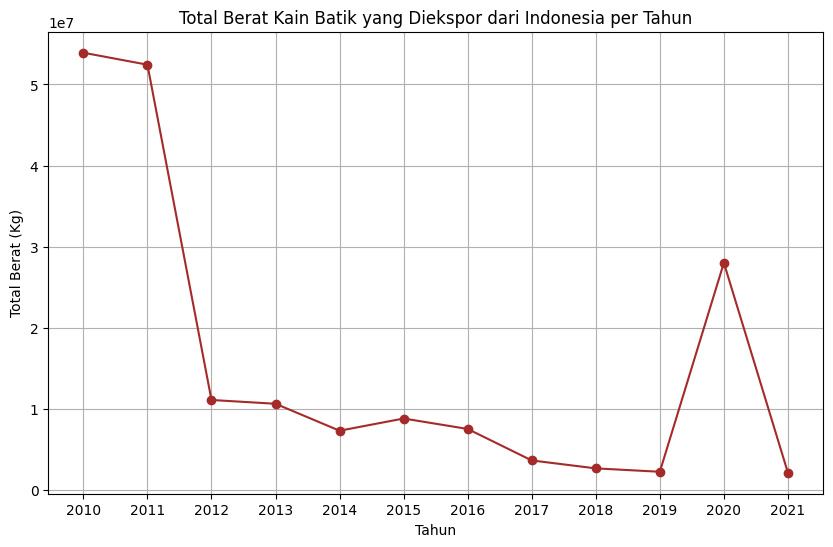

In [29]:
# Membuat grafik garis untuk total berat ekspor batik per tahun
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Tahun'], yearly_totals['Berat'], marker='o', color='brown')
plt.title('Total Berat Kain Batik yang Diekspor dari Indonesia per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Berat (Kg)')
plt.grid(True)
plt.show()


In [ ]:
# Membuat grafik garis untuk total nilai ekspor batik per tahun
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Tahun'], yearly_totals['Nilai'], marker='o', color='coral')
plt.title('Total Nilai yang Diperoleh Indonesia dari Ekspor Batik per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Nilai (USD)')
plt.grid(True)
plt.show()

Membandingkan tren berat dan nilai ekspor batik Indonesia dari tahun 2010 hingga 2021

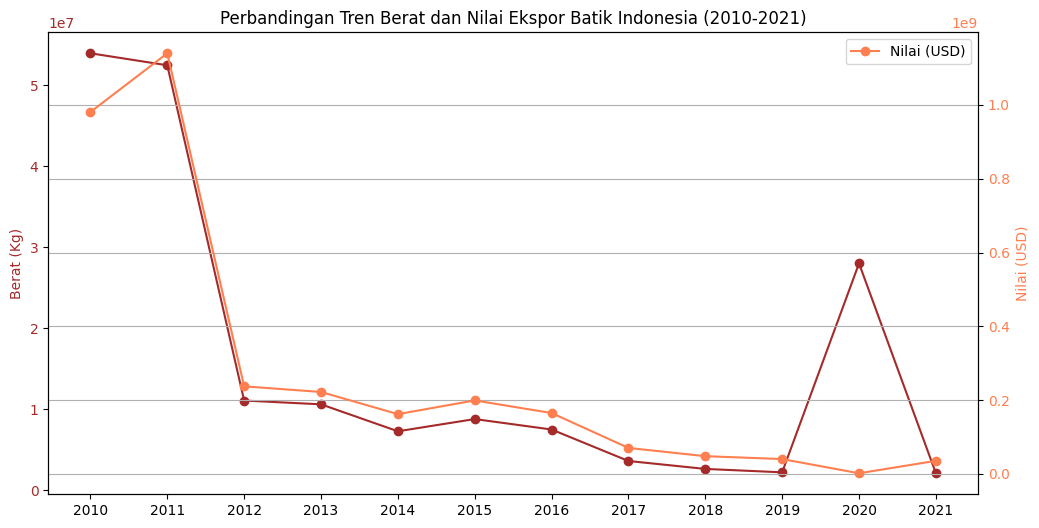

In [30]:
# Membuat grafik garis perbandingan untuk berat dan nilai ekspor batik
plt.figure(figsize=(12, 6))

# Sumbu Y kiri untuk berat
plt.plot(yearly_totals['Tahun'], yearly_totals['Berat'], marker='o', color='brown', label='Berat (Kg)')
plt.ylabel('Berat (Kg)', color='brown')
plt.tick_params(axis='y', labelcolor='brown')

# Sumbu Y kanan untuk nilai
ax2 = plt.twinx()  # Membuat sumbu Y kedua
ax2.plot(yearly_totals['Tahun'], yearly_totals['Nilai'], marker='o', color='coral', label='Nilai (USD)')
ax2.set_ylabel('Nilai (USD)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

plt.title('Perbandingan Tren Berat dan Nilai Ekspor Batik Indonesia (2010-2021)')
plt.xlabel('Tahun')
plt.grid(True)
plt.legend()
plt.show()


Berdasarkan grafik di atas, diperoleh informasi penting terkait tren berat dan nilai ekspor batik Indonesia selama periode 2010-2021 adalah sebagai berikut:

- Penurunan Berat Ekspor: Secara keseluruhan, terdapat penurunan signifikan dalam berat ekspor batik. Penurunan paling tajam terjadi antara tahun 2010 dan 2012, diikuti oleh penurunan yang lebih gradual namun konsisten hingga tahun 2021.

- Fluktuasi Nilai Ekspor: Meskipun berat ekspor menurun, nilai ekspor batik (dalam USD) menunjukkan fluktuasi. Terdapat penurunan tajam pada tahun 2011, diikuti oleh periode relatif stabil dengan sedikit peningkatan pada tahun 2020. Namun, secara umum, nilai ekspor tidak mengalami penurunan sedrastis berat ekspor.

- Kenaikan Nilai per Unit: Kesenjangan yang semakin lebar antara tren berat dan nilai ekspor mengindikasikan bahwa nilai batik per unit (per kilogram) meningkat. Hal ini dapat disebabkan oleh beberapa faktor, seperti peningkatan kualitas batik yang diekspor, pergeseran fokus ekspor ke produk batik dengan nilai tambah lebih tinggi, atau strategi penetapan harga yang lebih baik.

Kesimpulan: Secara keseluruhan, data menunjukkan bahwa ekspor batik Indonesia mengalami perubahan signifikan antara tahun 2010 dan 2021. Meskipun berat ekspor menurun, nilai ekspor relatif stabil, bahkan menunjukkan potensi peningkatan nilai per unit. Hal ini menunjukkan perlunya adaptasi strategi ekspor dengan fokus pada peningkatan nilai tambah dan kualitas produk batik.


### Menjawab pertanyaan bisnis 2

In [31]:
# Menentukan custom color scale dengan shades of brown
custom_color_scale = [
    [0.0, "#FFF8DC"],    # Lightest brown (cornsilk)
    [0.2, "#DEB887"],    # Light brown (burlywood)
    [0.4, "#D2B48C"],    # Medium brown (tan)
    [0.6, "#A0522D"],    # Dark brown (sienna)
    [0.8, "#8B4513"],    # Darker brown (saddle brown)
    [1.0, "#5D4037"]     # Darkest brown (sienna)
]

Menampilkan choropleth map negara tujuan ekspor batik Indonesia yang diberi keterangan nilai ekspor yang diperoleh Indonesia dari setiap negara

In [32]:
# Choropleth map berdasarkan nilai
fig_nilai = px.choropleth(batik_exp_fixed,
                          locations='Iso-3',
                          color='Nilai',
                          hover_name='Negara',
                          animation_frame='Tahun',
                          color_continuous_scale=custom_color_scale,
                          range_color=(0, batik_exp_fixed['Nilai'].max()),
                          labels={'Nilai': 'Nilai (USD)'},
                          title='Nilai yang Diperoleh dari Ekspor Batik Indonesia per Negara (2010-2021)')
fig_nilai.show()

Menampilkan 10 Negara dengan Total Nilai Tertinggi yang Diperoleh dari Ekspor Batik Indonesia selama 2010-2021

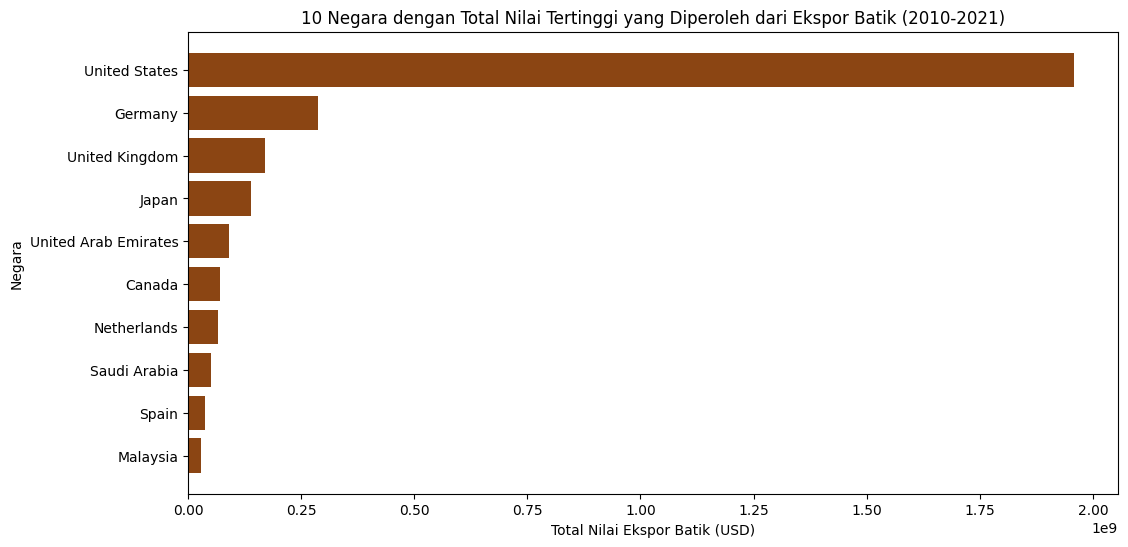

In [33]:
# Menghitung total nilai yang diperoleh dari ekspor di setiap negara
total_value_by_country = batik_exp_fixed.groupby('Negara')['Nilai'].sum().sort_values(ascending=False)

# Memilih 10 negara teratas
top_10_countries_value = total_value_by_country.head(10)

# Membuat grafik batang horizontal
plt.figure(figsize=(12, 6))
plt.barh(top_10_countries_value.index, top_10_countries_value.values, color='saddlebrown') # Mengubah warna bar menjadi medium brown
plt.xlabel('Total Nilai Ekspor Batik (USD)')
plt.ylabel('Negara')
plt.title('10 Negara dengan Total Nilai Tertinggi yang Diperoleh dari Ekspor Batik (2010-2021)')
plt.gca().invert_yaxis()  # Membalik urutan negara sehingga negara dengan nilai tertinggi berada di atas
plt.show()


Berdasarkan grafik di atas, dapat disimpulkan bahwa Amerika Serikat adalah tujuan utama ekspor batik Indonesia selama periode tersebut. Nilai yang diperoleh dari ekspor batik ke Amerika Serikat jauh melampaui negara-negara lain, bahkan melebihi gabungan nilai ekspor ke beberapa negara berikutnya.

Hal ini menunjukkan bahwa pasar Amerika Serikat memiliki permintaan yang signifikan terhadap batik Indonesia, baik dari segi volume maupun nilai.

## Menjawab pertanyaan bisnis 3

Menampilkan choropleth map negara tujuan ekspor batik Indonesia yang diberi keterangan berat batik yang diekspor dari Indonesia ke setiap negara

In [34]:
# Choropleth map berdasarkan berat
fig_berat = px.choropleth(batik_exp_fixed,
                          locations='Iso-3',
                          color='Berat',
                          hover_name='Negara',
                          animation_frame='Tahun',
                          color_continuous_scale=custom_color_scale,
                          range_color=(0, batik_exp_fixed['Berat'].max()),
                          labels={'Berat': 'Berat (Kg)'},
                          title='Berat Ekspor Batik Indonesia per Negara (2010-2021)')
fig_berat.show()

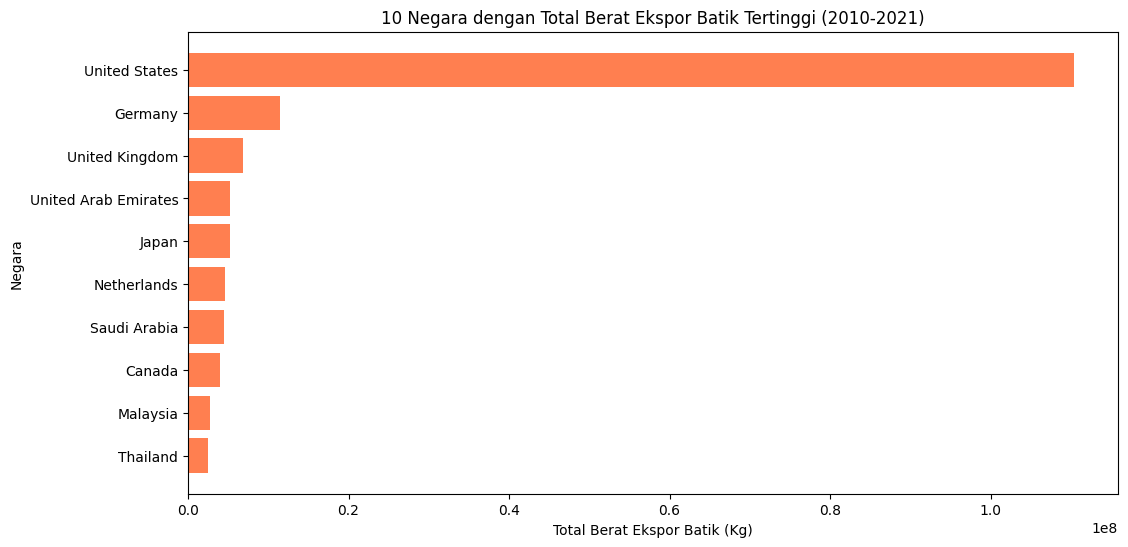

In [35]:
# Menghitung total berat ekspor untuk setiap negara
total_export_by_country = batik_exp_fixed.groupby('Negara')['Berat'].sum().sort_values(ascending=False)

# Memilih 10 negara teratas
top_10_countries = total_export_by_country.head(10)

# Membuat grafik batang horizontal
plt.figure(figsize=(12, 6))
plt.barh(top_10_countries.index, top_10_countries.values, color='coral')
plt.xlabel('Total Berat Ekspor Batik (Kg)')
plt.ylabel('Negara')
plt.title('10 Negara dengan Total Berat Ekspor Batik Tertinggi (2010-2021)')
plt.gca().invert_yaxis()  # Membalik urutan negara sehingga negara dengan nilai tertinggi berada di atas
plt.show()


Berdasarkan grafik di atas, dapat disimpulkan bahwa Amerika Serikat (United States) adalah negara yang paling banyak mengimpor kain batik Indonesia dalam periode 2010-2021. Hal ini terlihat dari total berat ekspor batik ke Amerika Serikat yang jauh melebihi negara-negara lain dalam daftar.

# Conclusion


Berdasarkan analisis dan visualisasi data yang sudah dilakukan, dapat diperoleh beberapa informasi penting sebagai berikut:

1. **Amerika Serikat sebagai Pasar Utama:** Amerika Serikat mendominasi ekspor batik Indonesia, baik dari segi nilai maupun volume (berat). Ini menunjukkan bahwa pasar Amerika Serikat memiliki minat yang tinggi terhadap batik Indonesia dan bersedia membayar harga yang lebih tinggi untuk produk tersebut.

2. **Potensi Pasar di Eropa dan Asia:** Meskipun Amerika Serikat menjadi pasar utama, terdapat potensi pasar yang signifikan di Eropa, khususnya Jerman, Inggris, dan Belanda. Selain itu, Malaysia sebagai perwakilan negara Asia juga menunjukkan potensi pasar yang dapat dieksplorasi lebih lanjut.

3. **Pergeseran Tren Ekspor:** Terjadi penurunan signifikan dalam berat ekspor batik sejak tahun 2010, namun nilai ekspor relatif stabil. Ini menunjukkan adanya pergeseran fokus industri batik Indonesia ke produk bernilai tambah lebih tinggi, seperti batik tulis atau batik dengan desain eksklusif.

4. **Peluang dan Tantangan:** Industri batik Indonesia memiliki peluang besar untuk terus berkembang di pasar internasional, terutama di Amerika Serikat dan Eropa. Namun, tantangan seperti persaingan dari negara lain dan perubahan tren pasar perlu diantisipasi dengan strategi yang tepat.

5. **Pentingnya Diversifikasi Pasar**: Meskipun Amerika Serikat merupakan pasar utama, penting bagi industri batik Indonesia untuk melakukan diversifikasi pasar dengan mengembangkan potensi pasar di negara-negara lain. Hal ini akan mengurangi risiko ketergantungan pada satu pasar dan membuka peluang pertumbuhan yang lebih besar.

# Mengunduh dataframe yang sudah diolah

In [36]:
batik_exp_fixed.to_csv('batik_exp_fixed.csv', index=False)